In [3]:
import sys, os, random
import numpy as np
import matplotlib.pyplot as plt

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'    # filter out Tensorflow INFO & WARNINGS messages

import tensorflow as tf
import kr_helper_funcs as kru

# SEED = 41
# random.seed(SEED)
# np.random.seed(SEED)
# tf.random.set_seed(SEED)
print(f"Using Tensorflow {tf.__version__}")
SEED = kru.seed_all()
# tweaks for Numpy, Pandas, Matplotlib & Seaborn
kru.setupSciLabModules()


Using Tensorflow 2.10.0


In [4]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(f"train_images.shape: {train_images.shape} - train_labels.shape: {train_labels.shape}\n"
      f"test_images.shape: {test_images.shape} - test_labels.shape: {test_labels.shape}")

train_images.shape: (60000, 28, 28) - train_labels.shape: (60000,)
test_images.shape: (10000, 28, 28) - test_labels.shape: (10000,)


In [5]:
from sklearn.model_selection import train_test_split

val_images, test_images, val_labels, test_labels = \
    train_test_split(test_images, test_labels, test_size=0.20, random_state=SEED)
print(f"train_images.shape: {train_images.shape} - train_labels.shape: {train_labels.shape}\n"
      f"val_images.shape: {val_images.shape} - val_labels.shape: {val_labels.shape}\n"
      f"test_images.shape: {test_images.shape} - test_labels.shape: {test_labels.shape}")

train_images.shape: (60000, 28, 28) - train_labels.shape: (60000,)
val_images.shape: (8000, 28, 28) - val_labels.shape: (8000,)
test_images.shape: (2000, 28, 28) - test_labels.shape: (2000,)


In [6]:
# preprocess the images data
inp_shape = train_images.shape[1] * train_images.shape[2]
train_images = train_images.reshape((train_images.shape[0], inp_shape))
train_images = train_images.astype("float32") / 255.0
val_images = val_images.reshape((val_images.shape[0], inp_shape))
val_images = val_images.astype("float32") / 255.0
test_images = test_images.reshape((test_images.shape[0], inp_shape))
test_images = test_images.astype("float32") / 255.0
print(f"train_images.shape: {train_images.shape} - train_labels.shape: {train_labels.shape}\n"
      f"val_images.shape: {val_images.shape} - val_labels.shape: {val_labels.shape}\n"
      f"test_images.shape: {test_images.shape} - test_labels.shape: {test_labels.shape}")

train_images.shape: (60000, 784) - train_labels.shape: (60000,)
val_images.shape: (8000, 784) - val_labels.shape: (8000,)
test_images.shape: (2000, 784) - test_labels.shape: (2000,)


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation

In [8]:
# Hyper parameters
EPOCHS = 25
BATCH_SIZE = 128
DROPOUT = 0.45

In [9]:
model = Sequential([
    Dense(256, input_shape=(inp_shape,)),
    Activation('relu'),
    Dropout(rate=DROPOUT),
    Dense(256),
    Activation('relu'),
    Dropout(rate=DROPOUT),
    Dense(10, input_shape=(inp_shape,)),
    Activation('softmax'),
])
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam', metrics=['acc'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                2

In [10]:
hist = model.fit(train_images, train_labels, validation_data=(val_images, val_labels), 
    epochs=EPOCHS, batch_size=BATCH_SIZE)

Epoch 1/25
469/469 [==============================] - 4s 6ms/step - loss: 0.4209 - acc: 0.8711 - val_loss: 0.1442 - val_acc: 0.9555
Epoch 2/25
469/469 [==============================] - 3s 6ms/step - loss: 0.1926 - acc: 0.9418 - val_loss: 0.1063 - val_acc: 0.9664
Epoch 3/25
469/469 [==============================] - 3s 6ms/step - loss: 0.1492 - acc: 0.9550 - val_loss: 0.0894 - val_acc: 0.9719
Epoch 4/25
469/469 [==============================] - 3s 6ms/step - loss: 0.1276 - acc: 0.9614 - val_loss: 0.0782 - val_acc: 0.9762
Epoch 5/25
469/469 [==============================] - 3s 6ms/step - loss: 0.1119 - acc: 0.9647 - val_loss: 0.0776 - val_acc: 0.9755
Epoch 6/25
469/469 [==============================] - 3s 6ms/step - loss: 0.1008 - acc: 0.9684 - val_loss: 0.0708 - val_acc: 0.9774
Epoch 7/25
469/469 [==============================] - 3s 6ms/step - loss: 0.0949 - acc: 0.9700 - val_loss: 0.0712 - val_acc: 0.9794
Epoch 8/25
469/469 [==============================] - 3s 6ms/step - loss: 0.

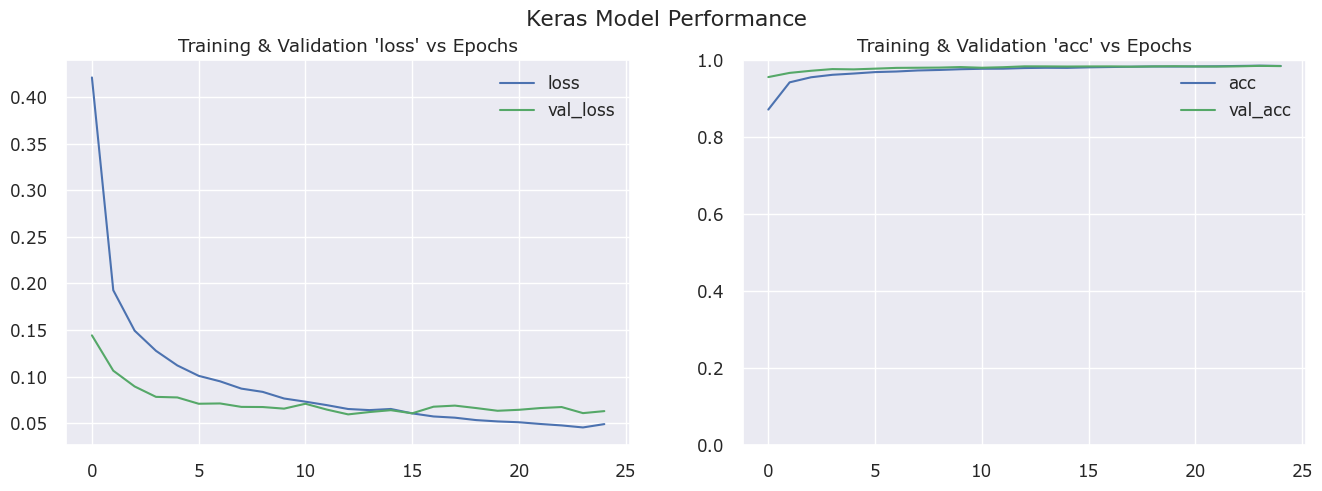

In [11]:
import kr_helper_funcs as kru

kru.show_plots(hist.history, metric="acc", plot_title="Keras Model Performance")

In [12]:
print("Evaluating model")
loss, acc = model.evaluate(train_images, train_labels)
print(f"  Training  -> loss: {loss:.3f} - {acc:.3f}")
loss, acc = model.evaluate(val_images, val_labels)
print(f"  Cross-val -> loss: {loss:.3f} - {acc:.3f}")
loss, acc = model.evaluate(test_images, test_labels)
print(f"  Testing   -> loss: {loss:.3f} - {acc:.3f}")

Evaluating model
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0092 - acc: 0.9977
  Training  -> loss: 0.009 - 0.998
250/250 [==============================] - 1s 3ms/step - loss: 0.0629 - acc: 0.9840
  Cross-val -> loss: 0.063 - 0.984
63/63 [==============================] - 0s 2ms/step - loss: 0.0579 - acc: 0.9795
  Testing   -> loss: 0.058 - 0.979


In [13]:
# run predictions on test data
test_labels_pred_proba = model.predict(test_images)
test_labels_pred = np.argmax(test_labels_pred_proba, axis=1)
test_labels[:20], test_labels_pred[:20]

63/63 [==============================] - 0s 2ms/step


(array([4, 6, 3, 1, 8, 8, 4, 3, 8, 0, 3, 4, 1, 6, 7, 0, 3, 7, 8, 4], dtype=uint8),
 array([4, 6, 3, 1, 8, 8, 4, 3, 8, 0, 3, 4, 1, 6, 7, 0, 3, 7, 8, 4], dtype=int64))

## Adding L2 Regularization to the model

In [14]:
from tensorflow.keras.regularizers import l2

L2_REG_FACTOR = 1e-5
l2_reg = l2(L2_REG_FACTOR)

In [15]:
model2 = Sequential([
    Dense(256, kernel_regularizer=l2_reg, input_shape=(inp_shape,)),
    Activation('relu'),
    Dropout(rate=DROPOUT),
    Dense(256, kernel_regularizer=l2_reg),
    Activation('relu'),
    Dropout(rate=DROPOUT),
    Dense(10, input_shape=(inp_shape,)),
    Activation('softmax'),
])
model2.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam', metrics=['acc'])
print(model2.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 256)               200960    
                                                                 
 activation_3 (Activation)   (None, 256)               0         
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               65792     
                                                                 
 activation_4 (Activation)   (None, 256)               0         
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 10)               

In [16]:
hist2 = model2.fit(train_images, train_labels, validation_data=(val_images, val_labels), 
    epochs=EPOCHS, batch_size=BATCH_SIZE)

Epoch 1/25
469/469 [==============================] - 4s 6ms/step - loss: 0.4293 - acc: 0.8702 - val_loss: 0.1467 - val_acc: 0.9561
Epoch 2/25
469/469 [==============================] - 3s 6ms/step - loss: 0.2032 - acc: 0.9424 - val_loss: 0.1158 - val_acc: 0.9656
Epoch 3/25
469/469 [==============================] - 3s 6ms/step - loss: 0.1604 - acc: 0.9538 - val_loss: 0.1004 - val_acc: 0.9714
Epoch 4/25
469/469 [==============================] - 3s 6ms/step - loss: 0.1376 - acc: 0.9617 - val_loss: 0.0867 - val_acc: 0.9762
Epoch 5/25
469/469 [==============================] - 3s 6ms/step - loss: 0.1249 - acc: 0.9651 - val_loss: 0.0923 - val_acc: 0.9750
Epoch 6/25
469/469 [==============================] - 3s 6ms/step - loss: 0.1130 - acc: 0.9692 - val_loss: 0.0841 - val_acc: 0.9774
Epoch 7/25
469/469 [==============================] - 3s 6ms/step - loss: 0.1058 - acc: 0.9703 - val_loss: 0.0847 - val_acc: 0.9789
Epoch 8/25
469/469 [==============================] - 3s 6ms/step - loss: 0.

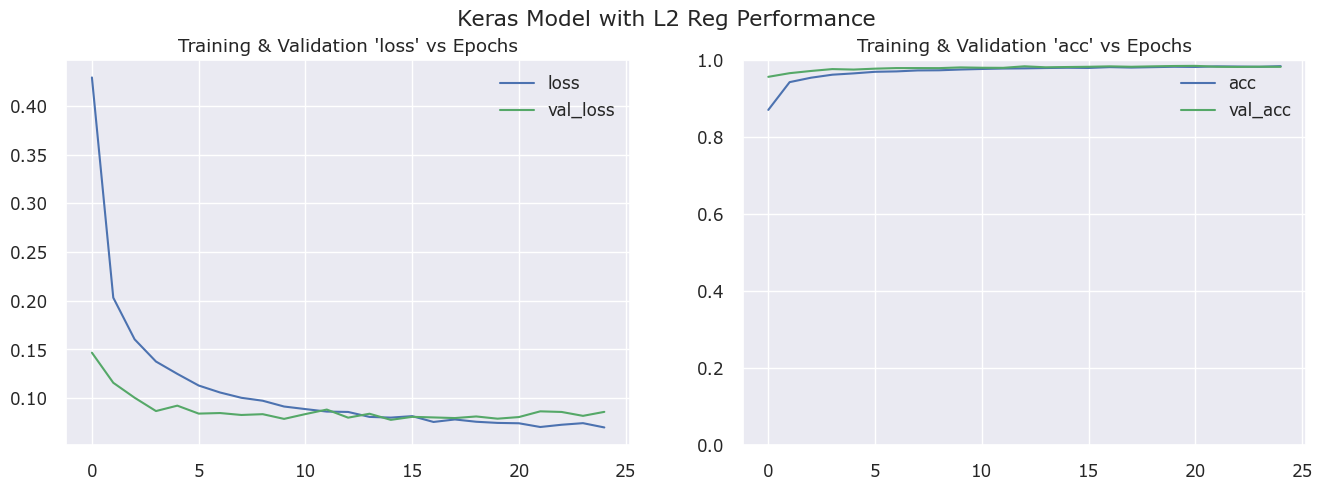

In [17]:
import kr_helper_funcs as kru

kru.show_plots(hist2.history, metric="acc", plot_title="Keras Model with L2 Reg Performance")

In [18]:
print("Evaluating model")
loss, acc = model2.evaluate(train_images, train_labels)
print(f"  Training  -> loss: {loss:.3f} - {acc:.3f}")
loss, acc = model2.evaluate(val_images, val_labels)
print(f"  Cross-val -> loss: {loss:.3f} - {acc:.3f}")
loss, acc = model2.evaluate(test_images, test_labels)
print(f"  Testing   -> loss: {loss:.3f} - {acc:.3f}")

Evaluating model
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0308 - acc: 0.9975
  Training  -> loss: 0.031 - 0.997
250/250 [==============================] - 1s 3ms/step - loss: 0.0859 - acc: 0.9821
  Cross-val -> loss: 0.086 - 0.982
63/63 [==============================] - 0s 2ms/step - loss: 0.0890 - acc: 0.9820
  Testing   -> loss: 0.089 - 0.982


In [19]:
# run predictions on test data
test_labels_pred_proba = model2.predict(test_images)
test_labels_pred = np.argmax(test_labels_pred_proba, axis=1)
test_labels[:20], test_labels_pred[:20]

63/63 [==============================] - 0s 2ms/step


(array([4, 6, 3, 1, 8, 8, 4, 3, 8, 0, 3, 4, 1, 6, 7, 0, 3, 7, 8, 4], dtype=uint8),
 array([4, 6, 3, 1, 8, 8, 4, 3, 8, 0, 3, 4, 1, 6, 7, 0, 3, 7, 8, 4], dtype=int64))

## Using a CNN in the Model
In this section, we'll develop a classifier using CNN

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from tensorflow.keras.regularizers import l2

In [21]:
# load the data
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(f"train_images.shape: {train_images.shape} - train_labels.shape: {train_labels.shape}\n"
      f"test_images.shape: {test_images.shape} - test_labels.shape: {test_labels.shape}")

train_images.shape: (60000, 28, 28) - train_labels.shape: (60000,)
test_images.shape: (10000, 28, 28) - test_labels.shape: (10000,)


In [22]:
from sklearn.model_selection import train_test_split

val_images, test_images, val_labels, test_labels = \
    train_test_split(test_images, test_labels, test_size=0.20, random_state=SEED)
print(f"train_images.shape: {train_images.shape} - train_labels.shape: {train_labels.shape}\n"
      f"val_images.shape: {val_images.shape} - val_labels.shape: {val_labels.shape}\n"
      f"test_images.shape: {test_images.shape} - test_labels.shape: {test_labels.shape}")

train_images.shape: (60000, 28, 28) - train_labels.shape: (60000,)
val_images.shape: (8000, 28, 28) - val_labels.shape: (8000,)
test_images.shape: (2000, 28, 28) - test_labels.shape: (2000,)


In [23]:
# preprocess the images data
image_size = train_images.shape[1]
train_images = train_images.reshape([-1, image_size, image_size, 1])
train_images = train_images.astype("float32") / 255.0
val_images = val_images.reshape([-1, image_size, image_size, 1])
val_images = val_images.astype("float32") / 255.0
test_images = test_images.reshape([-1, image_size, image_size, 1])
test_images = test_images.astype("float32") / 255.0
print(f"train_images.shape: {train_images.shape} - train_labels.shape: {train_labels.shape}\n"
      f"val_images.shape: {val_images.shape} - val_labels.shape: {val_labels.shape}\n"
      f"test_images.shape: {test_images.shape} - test_labels.shape: {test_labels.shape}")


train_images.shape: (60000, 28, 28, 1) - train_labels.shape: (60000,)
val_images.shape: (8000, 28, 28, 1) - val_labels.shape: (8000,)
test_images.shape: (2000, 28, 28, 1) - test_labels.shape: (2000,)


In [24]:
INPUT_SHAPE = (image_size, image_size, 1)
EPOCHS = 25
BATCH_SIZE = 64
KERNEL_SIZE = 3
POOL_SIZE = 2
FILTERS = 64
DROPOUT = 0.2
NUM_CLASSES = 10

In [25]:
L2_REG_FACTOR = 1e-5
l2_reg = l2(L2_REG_FACTOR)


In [26]:
cnn_model = Sequential([
    Conv2D(filters=FILTERS, kernel_size=KERNEL_SIZE, activation='relu', 
           kernel_regularizer=l2_reg, input_shape=INPUT_SHAPE),
    MaxPooling2D(pool_size=POOL_SIZE),
    Conv2D(filters=FILTERS, kernel_size=KERNEL_SIZE, activation='relu',
           kernel_regularizer=l2_reg),
    MaxPooling2D(pool_size=POOL_SIZE),
    Conv2D(filters=FILTERS, kernel_size=KERNEL_SIZE, activation='relu',
           kernel_regularizer=l2_reg),
    MaxPooling2D(pool_size=POOL_SIZE),
    Flatten(),
    Dropout(DROPOUT),
    Dense(NUM_CLASSES, kernel_regularizer=l2_reg),
    Activation('softmax')
])
cnn_model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam', metrics=['acc'])
print(cnn_model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 64)        

In [27]:
hist = cnn_model.fit(train_images, train_labels, validation_data=(val_images, val_labels), 
    epochs=EPOCHS, batch_size=BATCH_SIZE)

Epoch 1/25
938/938 [==============================] - 46s 48ms/step - loss: 0.3056 - acc: 0.9079 - val_loss: 0.0907 - val_acc: 0.9735
Epoch 2/25
938/938 [==============================] - 56s 60ms/step - loss: 0.1107 - acc: 0.9680 - val_loss: 0.0712 - val_acc: 0.9786
Epoch 3/25
938/938 [==============================] - 63s 67ms/step - loss: 0.0828 - acc: 0.9761 - val_loss: 0.0579 - val_acc: 0.9836
Epoch 4/25
938/938 [==============================] - 61s 66ms/step - loss: 0.0700 - acc: 0.9796 - val_loss: 0.0607 - val_acc: 0.9824
Epoch 5/25
938/938 [==============================] - 61s 65ms/step - loss: 0.0614 - acc: 0.9825 - val_loss: 0.0592 - val_acc: 0.9833
Epoch 6/25
938/938 [==============================] - 60s 64ms/step - loss: 0.0550 - acc: 0.9849 - val_loss: 0.0651 - val_acc: 0.9818
Epoch 7/25
938/938 [==============================] - 59s 63ms/step - loss: 0.0485 - acc: 0.9869 - val_loss: 0.0489 - val_acc: 0.9877
Epoch 8/25
938/938 [==============================] - 61s 65ms

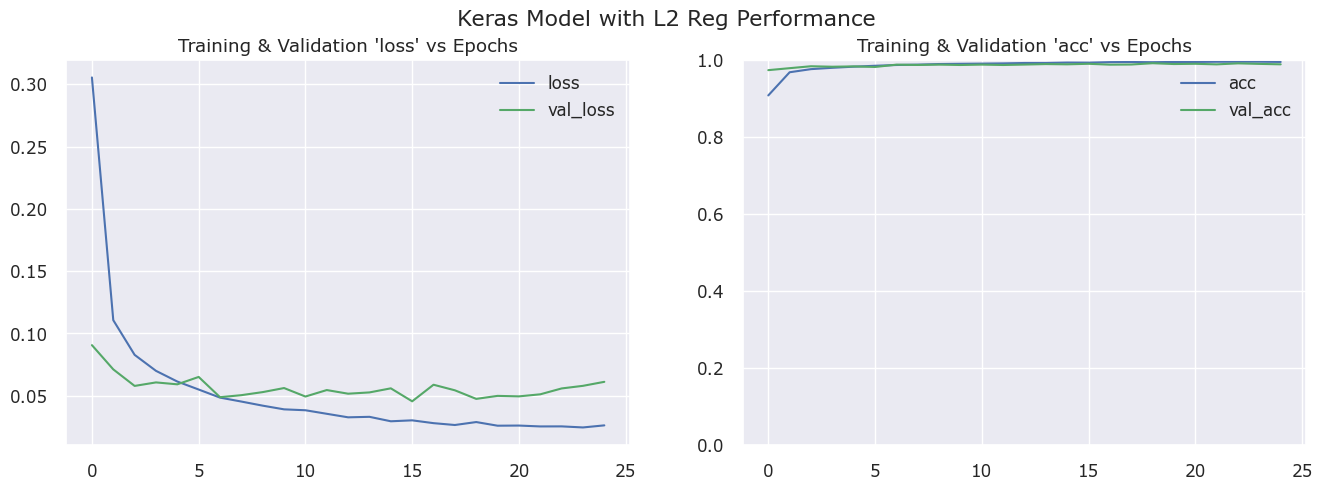

In [28]:
import kr_helper_funcs as kru

kru.show_plots(hist.history, metric="acc", plot_title="Keras Model with L2 Reg Performance")

In [29]:
print("Evaluating model")
loss, acc = cnn_model.evaluate(train_images, train_labels)
print(f"  Training  -> loss: {loss:.3f} - {acc:.3f}")
loss, acc = cnn_model.evaluate(val_images, val_labels)
print(f"  Cross-val -> loss: {loss:.3f} - {acc:.3f}")
loss, acc = cnn_model.evaluate(test_images, test_labels)
print(f"  Testing   -> loss: {loss:.3f} - {acc:.3f}")

Evaluating model
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0155 - acc: 0.9988
  Training  -> loss: 0.016 - 0.999
250/250 [==============================] - 2s 10ms/step - loss: 0.0612 - acc: 0.9886
  Cross-val -> loss: 0.061 - 0.989
63/63 [==============================] - 1s 9ms/step - loss: 0.0620 - acc: 0.9910
  Testing   -> loss: 0.062 - 0.991


In [30]:
# run predictions on test data
test_labels_pred_proba = cnn_model.predict(test_images)
test_labels_pred = np.argmax(test_labels_pred_proba, axis=1)
test_labels[:20], test_labels_pred[:20]

63/63 [==============================] - 1s 9ms/step


(array([4, 6, 3, 1, 8, 8, 4, 3, 8, 0, 3, 4, 1, 6, 7, 0, 3, 7, 8, 4], dtype=uint8),
 array([4, 6, 3, 1, 8, 8, 4, 3, 8, 0, 3, 4, 1, 4, 7, 0, 3, 7, 8, 4], dtype=int64))